<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/7_4_Regression_polynomiale_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Démonstration de régression polynomiale
Contexte: Relation entre vitesse de conduite et consommation d'essence
Dataset généré:
  Nombre de mesures: 100
  Vitesse moyenne: 77.0 km/h
  Consommation moyenne: 8.1 L/100km
  Corrélation linéaire: -0.656

Comparaison de différents degrés polynomiaux:
Degré    R² Train   R² Test    RMSE Test    Overfitting
------------------------------------------------------------
1        0.4050     0.5124     1.501        -0.1073
2        0.9557     0.9656     0.399        -0.0100
3        0.9561     0.9653     0.401        -0.0092
4        0.9571     0.9627     0.415        -0.0056
5        0.9572     0.9629     0.414        -0.0057


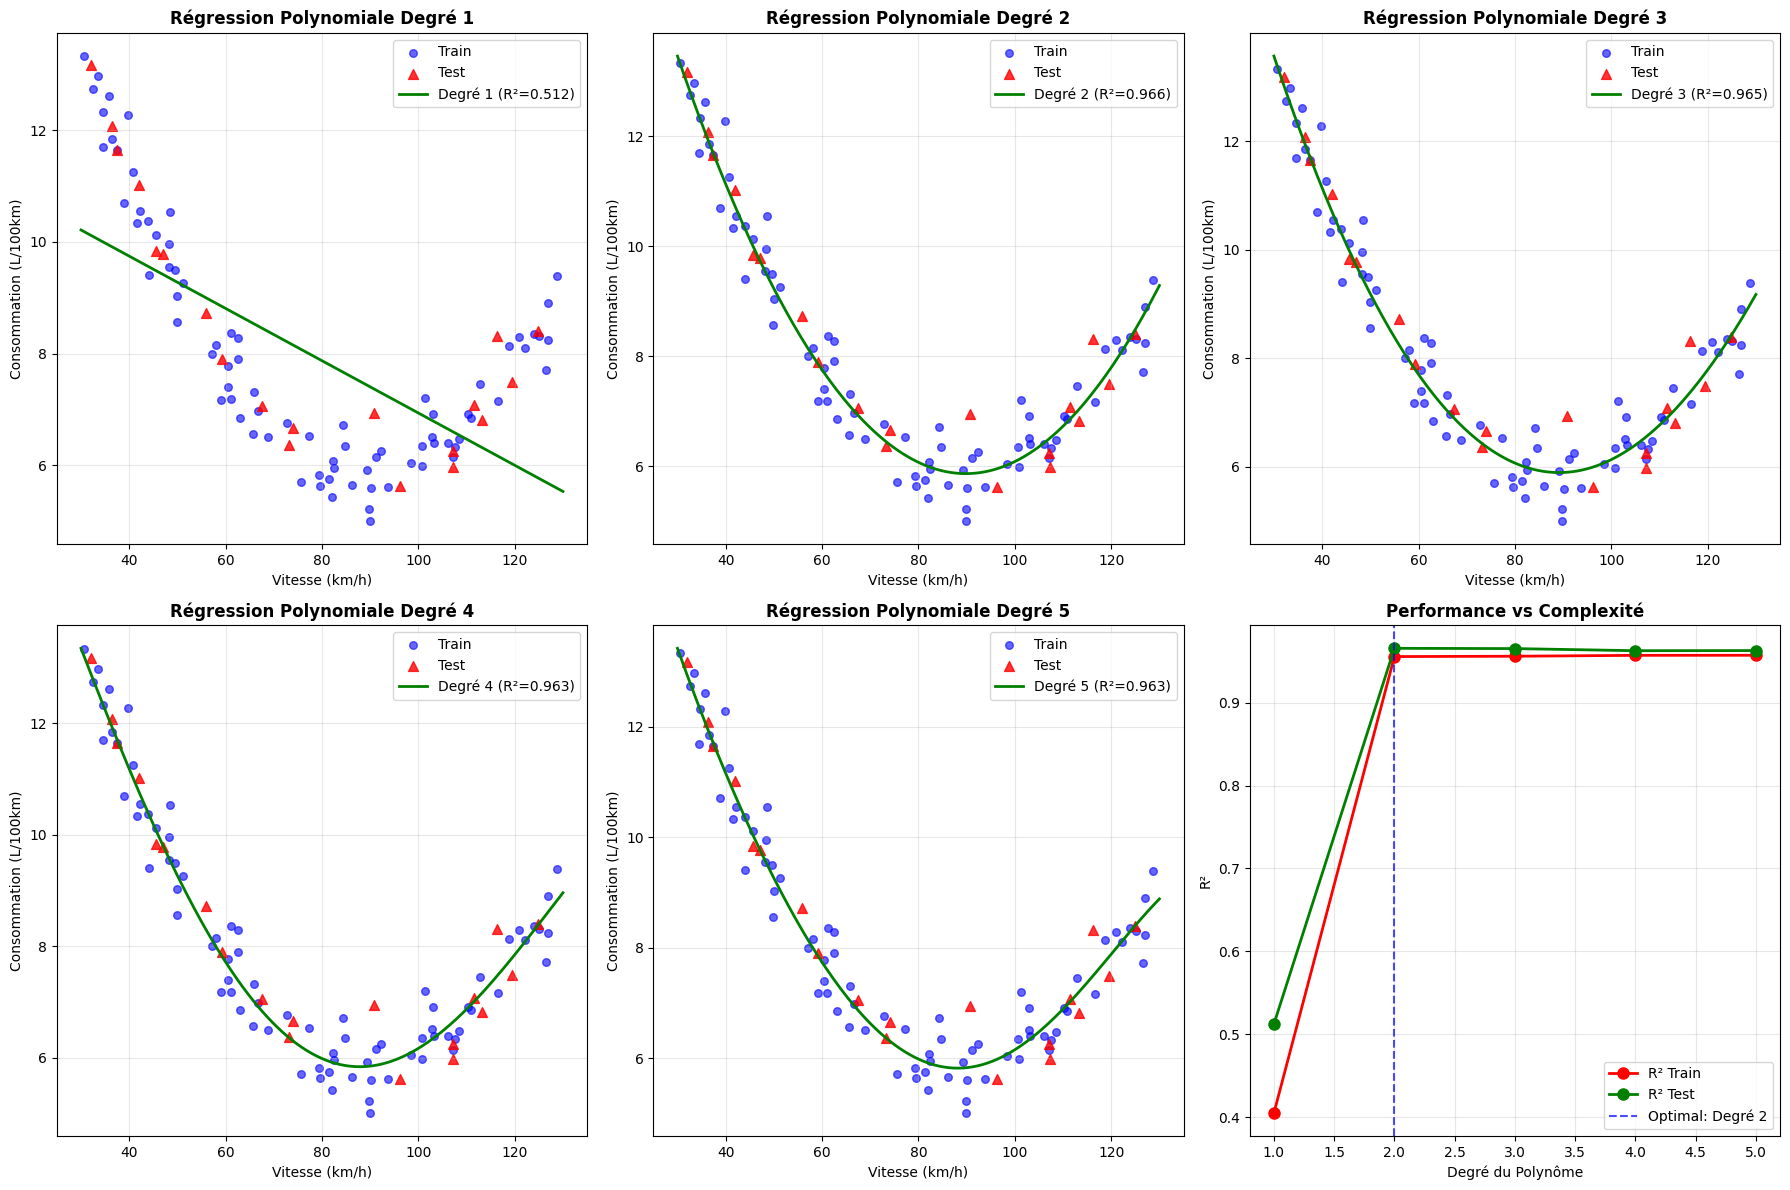


Analyse du modèle optimal (Degré 2):
R² test: 0.9656
RMSE test: 0.399 L/100km
Overfitting: -0.0100

Équation polynomiale trouvée:
Consommation = 22.980 -0.381086×Vitesse +0.002121×Vitesse^2

Interprétation physique:
  Vitesse optimale calculée: 89.8 km/h
  Consommation minimale: 5.86 L/100km

Recommandations pratiques:
  • Rouler autour de 90 km/h pour économiser
  • Éviter les vitesses extrêmes (très basses ou très hautes)
  • Économie potentielle vs vitesse sous-optimale:
    À 50 km/h: +3.37 L/100km (+57.4%)
    À 70 km/h: +0.83 L/100km (+14.2%)
    À 110 km/h: +0.86 L/100km (+14.7%)
    À 130 km/h: +3.42 L/100km (+58.4%)

Analyse des risques par degré:

Degré 1:
  • Régression linéaire classique
  • Risque: Underfitting si relation non-linéaire
  ✅ Pas d'overfitting (-0.107)

Degré 2:
  • Forme parabolique (U ou U inversé)
  • Idéal pour optimums et relations quadratiques
  ✅ Pas d'overfitting (-0.010)

Degré 3:
  • Forme en S, peut capturer des inflexions
  • Bon pour des phénomè

In [1]:
#Régression polynomiale complète
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Créer des données avec une relation non-linéaire claire
print("Démonstration de régression polynomiale")
print("Contexte: Relation entre vitesse de conduite et consommation d'essence")
print("=" * 80)

np.random.seed(42)
n_points = 100

# Vitesse de conduite (km/h)
vitesse = np.random.uniform(30, 130, n_points)

# Consommation d'essence (relation en U inversé)
# Consommation minimale vers 90 km/h, plus élevée aux extrêmes
vitesse_optimale = 90
consommation_base = 0.002 * (vitesse - vitesse_optimale)**2 + 6  # Parabole
bruit = np.random.normal(0, 0.5, n_points)
consommation = consommation_base + bruit

# S'assurer que les valeurs restent réalistes
consommation = np.clip(consommation, 4, 15)  # Entre 4 et 15 L/100km

print(f"Dataset généré:")
print(f"  Nombre de mesures: {n_points}")
print(f"  Vitesse moyenne: {vitesse.mean():.1f} km/h")
print(f"  Consommation moyenne: {consommation.mean():.1f} L/100km")
print(f"  Corrélation linéaire: {np.corrcoef(vitesse, consommation)[0,1]:.3f}")

# Préparer les données
X = vitesse.reshape(-1, 1)
y = consommation

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparer différents degrés de polynômes
degrees = [1, 2, 3, 4, 5]
models = {}
results = {}

print(f"\nComparaison de différents degrés polynomiaux:")
print("=" * 60)
print(f"{'Degré':<8} {'R² Train':<10} {'R² Test':<10} {'RMSE Test':<12} {'Overfitting'}")
print("-" * 60)

# Créer des données pour visualisation (plus dense)
X_plot = np.linspace(30, 130, 200).reshape(-1, 1)

plt.figure(figsize=(18, 12))

for i, degree in enumerate(degrees):
    # Créer le pipeline avec transformation polynomiale
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Entraîner
    poly_model.fit(X_train, y_train)

    # Prédictions
    y_pred_train = poly_model.predict(X_train)
    y_pred_test = poly_model.predict(X_test)
    y_pred_plot = poly_model.predict(X_plot)

    # Métriques
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    overfitting = r2_train - r2_test

    # Stocker les résultats
    models[f'Degré {degree}'] = poly_model
    results[degree] = {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_test': rmse_test,
        'overfitting': overfitting
    }

    print(f"{degree:<8} {r2_train:<10.4f} {r2_test:<10.4f} {rmse_test:<12.3f} {overfitting:+.4f}")

    # Visualisation
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, y_train, alpha=0.6, color='blue', s=30, label='Train')
    plt.scatter(X_test, y_test, alpha=0.8, color='red', s=50, marker='^', label='Test')
    plt.plot(X_plot, y_pred_plot, color='green', linewidth=2,
             label=f'Degré {degree} (R²={r2_test:.3f})')

    plt.xlabel('Vitesse (km/h)')
    plt.ylabel('Consommation (L/100km)')
    plt.title(f'Régression Polynomiale Degré {degree}', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Marquer les zones problématiques pour les degrés élevés
    if degree > 3:
        # Détecter les oscillations extrêmes
        if np.max(y_pred_plot) > np.max(y) * 1.2 or np.min(y_pred_plot) < np.min(y) * 0.8:
            plt.text(0.05, 0.95, 'Oscillations\nextrêmes!',
                    transform=plt.gca().transAxes, fontsize=10,
                    bbox=dict(boxstyle='round', facecolor='red', alpha=0.3),
                    verticalalignment='top')

# Graphique de comparaison des performances
plt.subplot(2, 3, 6)
degrees_plot = list(results.keys())
r2_test_values = [results[d]['r2_test'] for d in degrees_plot]
r2_train_values = [results[d]['r2_train'] for d in degrees_plot]

plt.plot(degrees_plot, r2_train_values, 'o-', color='red', linewidth=2,
         label='R² Train', markersize=8)
plt.plot(degrees_plot, r2_test_values, 'o-', color='green', linewidth=2,
         label='R² Test', markersize=8)

# Marquer le meilleur degré
best_degree = max(results.keys(), key=lambda k: results[k]['r2_test'])
best_r2 = results[best_degree]['r2_test']
plt.axvline(best_degree, color='blue', linestyle='--', alpha=0.7,
           label=f'Optimal: Degré {best_degree}')

plt.xlabel('Degré du Polynôme')
plt.ylabel('R²')
plt.title('Performance vs Complexité', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyse détaillée du meilleur modèle
print(f"\nAnalyse du modèle optimal (Degré {best_degree}):")
print("=" * 50)

best_model = models[f'Degré {best_degree}']
poly_features = best_model.named_steps['poly']
linear_model = best_model.named_steps['linear']

print(f"R² test: {best_r2:.4f}")
print(f"RMSE test: {results[best_degree]['rmse_test']:.3f} L/100km")
print(f"Overfitting: {results[best_degree]['overfitting']:+.4f}")

# Analyser les coefficients du polynôme
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print(f"\nÉquation polynomiale trouvée:")
equation = f"Consommation = {intercept:.3f}"
for i, coef in enumerate(coefficients[1:], 1):  # Skip intercept
    if abs(coef) > 1e-10:  # Éviter les coefficients quasi-nuls
        signe = "+" if coef >= 0 else ""
        if i == 1:
            equation += f" {signe}{coef:.6f}×Vitesse"
        else:
            equation += f" {signe}{coef:.6f}×Vitesse^{i}"

print(equation)

# Interpréter physiquement
vitesse_optimale_calculee = -coefficients[1] / (2 * coefficients[2]) if len(coefficients) > 2 and coefficients[2] != 0 else None

if vitesse_optimale_calculee and 30 <= vitesse_optimale_calculee <= 130:
    print(f"\nInterprétation physique:")
    print(f"  Vitesse optimale calculée: {vitesse_optimale_calculee:.1f} km/h")
    consommation_optimale = best_model.predict([[vitesse_optimale_calculee]])[0]
    print(f"  Consommation minimale: {consommation_optimale:.2f} L/100km")

    print(f"\nRecommandations pratiques:")
    print(f"  • Rouler autour de {vitesse_optimale_calculee:.0f} km/h pour économiser")
    print(f"  • Éviter les vitesses extrêmes (très basses ou très hautes)")
    print(f"  • Économie potentielle vs vitesse sous-optimale:")

    # Calculer les économies potentielles
    for vitesse_test in [50, 70, 110, 130]:
        conso_test = best_model.predict([[vitesse_test]])[0]
        surcons = conso_test - consommation_optimale
        print(f"    À {vitesse_test} km/h: +{surcons:.2f} L/100km ({surcons/consommation_optimale*100:+.1f}%)")

# Analyser les risques de l'overfitting polynomial
print(f"\nAnalyse des risques par degré:")
print("=" * 40)

for degree in degrees:
    overfitting = results[degree]['overfitting']
    r2_test = results[degree]['r2_test']

    print(f"\nDegré {degree}:")
    if degree == 1:
        print("  • Régression linéaire classique")
        print("  • Risque: Underfitting si relation non-linéaire")
    elif degree == 2:
        print("  • Forme parabolique (U ou U inversé)")
        print("  • Idéal pour optimums et relations quadratiques")
    elif degree == 3:
        print("  • Forme en S, peut capturer des inflexions")
        print("  • Bon pour des phénomènes avec points de retournement")
    elif degree >= 4:
        print("  • Formes complexes possibles")
        print("  • ATTENTION: Risque élevé d'overfitting")

    if overfitting > 0.1:
        print(f"  ⚠️ Overfitting détecté ({overfitting:.3f})")
    elif overfitting > 0.05:
        print(f"  ⚠️ Overfitting modéré ({overfitting:.3f})")
    else:
        print(f"  ✅ Pas d'overfitting ({overfitting:.3f})")

# Démonstration des dangers des degrés élevés
print(f"\nDémonstration: Pourquoi éviter les degrés trop élevés")
print("=" * 60)

# Créer un petit dataset pour montrer l'overfitting extrême
np.random.seed(123)
X_small = np.random.uniform(0, 10, 15).reshape(-1, 1)
y_small = 2 * X_small.ravel() + np.random.normal(0, 1, 15)

# Tester un polynôme de degré 10 sur seulement 15 points
poly_extreme = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('linear', LinearRegression())
])

poly_extreme.fit(X_small, y_small)
X_plot_small = np.linspace(0, 10, 200).reshape(-1, 1)
y_plot_extreme = poly_extreme.predict(X_plot_small)

print(f"Exemple extrême: Polynôme degré 10 sur 15 points")
print(f"  R² sur données d'entraînement: {poly_extreme.score(X_small, y_small):.4f}")

# Vérifier les oscillations
oscillation_range = y_plot_extreme.max() - y_plot_extreme.min()
data_range = y_small.max() - y_small.min()
oscillation_ratio = oscillation_range / data_range

print(f"  Oscillation des prédictions: {oscillation_ratio:.1f}x la variation des données")

if oscillation_ratio > 3:
    print("  🚨 DANGER: Oscillations extrêmes détectées!")
    print("     → Le modèle prédit des valeurs absurdes en dehors des données")
    print("     → Inutilisable pour l'extrapolation")

# Règles pratiques
print(f"\nRègles pratiques pour choisir le degré:")
print("=" * 50)
print("Degré 1 (Linéaire):")
print("  ✅ Utilisez quand la relation semble droite")
print("  ✅ Interprétation simple")
print("  ✅ Pas de risque d'overfitting")

print("\nDegré 2 (Quadratique):")
print("  ✅ Parfait pour les optimums (max/min)")
print("  ✅ Courbes en U ou U inversé")
print("  ✅ Encore facilement interprétable")

print("\nDegré 3 (Cubique):")
print("  ⚠️ Utilisez avec précaution")
print("  ⚠️ Peut créer des inflexions non réalistes")
print("  ⚠️ Vérifiez toujours les prédictions aux extrêmes")

print("\nDegré ≥ 4:")
print("  ❌ Généralement déconseillé")
print("  ❌ Très haut risque d'overfitting")
print("  ❌ Oscillations imprévisibles")
print("  ❌ Perte d'interprétabilité")

# Guide de détection de la non-linéarité
print(f"\nComment détecter qu'une relation n'est pas linéaire:")
print("=" * 60)
print("1. Tracez un scatter plot de vos données")
print("   → Si les points forment une courbe, c'est non-linéaire!")

print("\n2. Analysez les résidus d'une régression linéaire")
print("   → Si les résidus montrent un pattern (courbe), c'est non-linéaire!")

print("\n3. Testez différents degrés avec validation croisée")
print("   → Si degré 2 ou 3 améliore significativement, c'est non-linéaire!")

# Alternatives à la régression polynomiale
print(f"\nAlternatives à considérer:")
print("=" * 40)
print("Si la régression polynomiale ne marche pas bien:")
print("  • Splines (courbes lisses par morceaux)")
print("  • Régression locale (LOWESS)")
print("  • Random Forest (capture automatiquement les non-linéarités)")
print("  • SVM avec kernel RBF")
print("  • Réseaux de neurones")

# Cas d'usage typiques
print(f"\nCas d'usage typiques de la régression polynomiale:")
print("=" * 60)
print("Degré 2 (Parabole):")
print("  • Relation prix-demande en économie")
print("  • Optimisation de processus industriels")
print("  • Trajectoires balistiques")
print("  • Courbes de croissance avec saturation")

print("\nDegré 3 (Cubique):")
print("  • Courbes de croissance en S")
print("  • Phénomènes avec points d'inflexion")
print("  • Modèles démographiques")
print("  • Réponses dose-effet en médecine")

# Exemple d'application pratique
print(f"\nExemple d'application: Optimisation marketing")
print("=" * 50)
print("Problème: Relation entre budget publicitaire et ventes")
print("Hypothèse: Les premiers euros sont très efficaces,")
print("           puis l'efficacité diminue (saturation)")
print("Solution: Régression polynomiale degré 2 pour trouver")
print("         le budget optimal avant saturation")

# Créer un exemple d'optimisation
budget_pub = np.linspace(1000, 50000, 50)
# Relation avec saturation (racine carrée + terme quadratique négatif)
ventes_base = 10000 + 2.5 * np.sqrt(budget_pub) - 0.0000001 * budget_pub**2
ventes_pub = ventes_base + np.random.normal(0, 500, len(budget_pub))

# Trouver l'optimum avec régression polynomiale
X_budget = budget_pub.reshape(-1, 1)
poly_marketing = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

poly_marketing.fit(X_budget, ventes_pub)

# Trouver le maximum (dérivée = 0)
# Pour ax² + bx + c, le maximum est en x = -b/(2a)
coeffs = poly_marketing.named_steps['linear'].coef_
if len(coeffs) >= 3 and coeffs[2] < 0:  # Coefficient de x² négatif
    budget_optimal = -coeffs[1] / (2 * coeffs[2])
    ventes_optimales = poly_marketing.predict([[budget_optimal]])[0]

    print(f"\nOptimisation trouvée:")
    print(f"  Budget optimal: {budget_optimal:,.0f}€")
    print(f"  Ventes maximales prédites: {ventes_optimales:,.0f}€")
    print(f"  ROI au budget optimal: {(ventes_optimales/budget_optimal - 1)*100:.1f}%")
else:
    print("\nPas d'optimum trouvé dans cette plage de budget")

print(f"\n💡 Conseil final:")
print("La régression polynomiale est puissante mais dangereuse.")
print("Commencez toujours par degré 2, et augmentez seulement si nécessaire.")
print("Validez TOUJOURS avec des données indépendantes !")